### 1. Analyze the relationship between cholesterol levels and heart attack risk, considering additional factors such as BMI, blood pressure, triglyceride levels, and lifestyle habits. What patterns indicate a stronger correlation?

Data: https://drive.google.com/file/d/13ShLPdVJdjiCsyIuif4Ih45ZUA9Zu8Zz/view?usp=sharing

In [187]:
import pandas as pd

### Step 1:

#### Load and display the script.

In [188]:
# This loads the uploaded CSV file
file_path = '/Users/user/Desktop/python-tasks/test-week5/task-2/HEART_ATTACK_MALE.csv'

# This reads the CSV file and loads all the rows
df = pd.read_csv(file_path)

# Displays the first few rows to understand the structure
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East_M,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,27,Male,East_M,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
2,20,Male,West_M,Rural,Middle,Never,Never,Non-Vegetarian,High,2,...,High,171.5/107.1,115,Normal,Atypical,142,No,93.0,129,No
3,29,Male,East_M,Rural,High,Regularly,Never,Non-Vegetarian,Moderate,8,...,Low,176.7/110.0,118,Normal,Non-anginal,181,No,93.4,444,No
4,35,Male,West_M,Urban,High,Occasionally,Never,Non-Vegetarian,Sedentary,12,...,High,140.5/106.1,110,Normal,Asymptomatic,141,No,97.1,297,No


### Step 2:

#### Select the specified columns I'm working on into a new DataFrame

In [189]:
selected_columns = df[[
    'Cholesterol Levels (mg/dL)', 'Heart Attack Likelihood', 'BMI (kg/m²)', 'Blood Pressure (systolic/diastolic mmHg)', 
    'Triglyceride Levels (mg/dL)', 'Smoking Status', 'Alcohol Consumption', 'Diet Type', 'Physical Activity Level', 
    'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)'
]]

selected_columns.head()

,Cholesterol Levels (mg/dL),Heart Attack Likelihood,BMI (kg/m²),Blood Pressure (systolic/diastolic mmHg),Triglyceride Levels (mg/dL),Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day)
0,148,No,34.4,177.0/63.1,58,Never,Regularly,Non-Vegetarian,Sedentary,3,8
1,137,Yes,19.0,177.1/90.0,102,Occasionally,Never,Vegetarian,Sedentary,6,7
2,205,No,15.5,171.5/107.1,129,Never,Never,Non-Vegetarian,High,2,5
3,278,No,21.4,176.7/110.0,444,Regularly,Never,Non-Vegetarian,Moderate,8,10
4,268,No,30.7,140.5/106.1,297,Occasionally,Never,Non-Vegetarian,Sedentary,12,9


### Step 3:

- This script converts categorical columns into numeric representations and 
splits a combined blood pressure column into separate systolic and diastolic values.
- To convert categorical data to numeric representations,
I mapped 'Heart Attack Likelihood', 'Diet Type' from text (Yes/No) to binary numbers (1/0) for easier analysis
- I Transformed 'Smoking Status', 'Alcohol Consumption', 'Physical Activity Level' into an ordinal scale based on frequency, 
with an increasing intensity from 'Never' to 'Regularly'.
- I splitted the combined 'Blood Pressure' column into separate systolic and diastolic columns using the following steps
- First, ensure it’s a string to handle any mixed types safely.
- Then, split at '/' into two columns (systolic/diastolic).
"expand=True" is a parameter used in methods like "str.split()". It splits the string into separate columns in a DataFrame, 
instead of returning a single column.
- "selected_columns.drop(columns=['Blood Pressure (systolic/diastolic mmHg)'], inplace=True)" removes the original 'Blood Pressure' column since I splitted it into two usable columns
"inplace=True" parameter is used in methods like drop(), fillna(), or replace() to tell Pandas to modify 
the DataFrame directly instead of returning a new copy. When inplace=True, the change happens “in place,” and nothing is returned.

In [190]:
# First step is to make a copy of the selected columns to avoid modifying the original DataFrame
# This ensures I'm working with an independent dataset and prevents unintended side effects
selected_columns = selected_columns.copy()

selected_columns.loc[:, 'Heart Attack Likelihood'] = selected_columns['Heart Attack Likelihood'].map({
    'No': 0,    # Assigned 0 for 'No' to indicate no likelihood
    'Yes': 1    # Assigned 1 for 'Yes' to indicate likelihood present
}).astype(float)  # This ensures the result is a float for consistency with other numeric data


selected_columns.loc[:, 'Smoking Status'] = selected_columns['Smoking Status'].map({
    'Never': 0,        # 0 for no smoking history
    'Occasionally': 1, # 1 for occasional smoking
    'Regularly': 2     # 2 for regular smoking
}).astype(float)


selected_columns.loc[:, 'Alcohol Consumption'] = selected_columns['Alcohol Consumption'].map({
    'Never': 0,        # 0 for no alcohol consumption
    'Occasionally': 1, # 1 for occasional drinking
    'Regularly': 2     # 2 for regular drinking
}).astype(float)



selected_columns.loc[:, 'Diet Type'] = selected_columns['Diet Type'].map({
    'Vegetarian': 0,     # 0 represents a vegetarian diet
    'Non-Vegetarian': 1  # 1 represents a non-vegetarian diet
}).astype(float)



selected_columns.loc[:, 'Physical Activity Level'] = selected_columns['Physical Activity Level'].map({
    'Sedentary': 0, # 0 for little to no activity
    'Moderate': 1,  # 1 for moderate activity
    'High': 2       # 2 for high activity
}).astype(float)



selected_columns[['Systolic BP', 'Diastolic BP']] = selected_columns['Blood Pressure (systolic/diastolic mmHg)']\
    .astype(str).str.split('/', expand=True).astype(float)



selected_columns.drop(columns=['Blood Pressure (systolic/diastolic mmHg)'], inplace=True)


# Display the first few rows of the transformed DataFrame
# This lets me verify that the conversions and splitting worked as expected.
selected_columns.head()

,Cholesterol Levels (mg/dL),Heart Attack Likelihood,BMI (kg/m²),Triglyceride Levels (mg/dL),Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Systolic BP,Diastolic BP
0,148,0.0,34.4,58,0.0,2.0,1.0,0.0,3,8,177.0,63.1
1,137,1.0,19.0,102,1.0,0.0,0.0,0.0,6,7,177.1,90.0
2,205,0.0,15.5,129,0.0,0.0,1.0,2.0,2,5,171.5,107.1
3,278,0.0,21.4,444,2.0,0.0,1.0,1.0,8,10,176.7,110.0
4,268,0.0,30.7,297,1.0,0.0,1.0,0.0,12,9,140.5,106.1


In [191]:
# Correlation of the dataset
corr_df = selected_columns.corr()

In [192]:
corr_df['Cholesterol Levels (mg/dL)']
# To view the correlation for Cholesterol levels

Cholesterol Levels (mg/dL)     1.000000
Heart Attack Likelihood        0.007020
BMI (kg/m²)                   -0.004582
Triglyceride Levels (mg/dL)    0.038135
Smoking Status                -0.005450
Alcohol Consumption           -0.005738
Diet Type                      0.003358
Physical Activity Level        0.013837
Screen Time (hrs/day)          0.028010
Sleep Duration (hrs/day)       0.020171
Systolic BP                    0.001893
Diastolic BP                  -0.004404
Name: Cholesterol Levels (mg/dL), dtype: float64

Query 1 Answer:
- The correlation between Cholesterol levels and Heart Attack risk is 0.007020, which suggests that there is no meaningful linear relationship between the two columns.

- The correlation between Cholesterol levels and BMI is -0.004582, which suggests that there is almost no relationship between the two columns.

- The correlation between Cholesterol levels and Systolic BP and Diastolic is 0.001893 and -0.004404 respectively, which suggests that there is very little or no relationship between those columns.

- The correlation between Cholesterol and Triglyceride levels is 0.038135, which suggests a very weak positive correlation between the two columns.

- In determining the correlation between Cholesterol levels and Lifestyle habits, the columns implicated were Smoking Status(-0.005450), Alcohol Consumption(-0.005738), Diet Type(0.003358), Physical Activity Level(0.013837), Screen Time(0.028010), and Sleep Duration(0.020171). These values do not suggest a strong correlation, however, there is a relative stronger level of correlation between Cholesterol levels and Physical Activity Level, Screen Time, and Sleep Duration.

### 2. Visualize how profit is distributed across different categories using a pie chart, and explode the wedge with the highest percentage of profit across all categories.

Data: https://drive.google.com/file/d/1-cCEA9WxaLbjx8MwQJUfrQOfznnE_r5k/view?usp=sharing

In [194]:
# This loads the uploaded CSV file
file_path = '/Users/user/Desktop/python-tasks/test-week5/task-2/Superstore.csv'

# This reads the CSV file and loads all the rows
df = pd.read_csv(file_path)

# Displays the first few rows to understand the structure
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


- Matplotlib is a drawing tool, and can be used to create graphs, imported as plt.
- "df.groupby('Category')" tells Pandas to look at the "Category" column and group all rows with the same category together (e.g., all Furniture sales in one group).
- "['Profit'].sum()": For each group, this takes the "Profit" column and add up all the values. So, this gives one total profit number for Furniture, one for Office Supplies, and one for Technology.
- "profit_by_category" is like a new mini-table with categories as the index (row labels) and their total profits as the values.
- This shows how much profit each category contributes, which is what the pie chart will show.
- "profit_by_category.sum()" takes the profit values from the previous step and gives the grand total.
- "profit_by_category / total_profit" divides each category’s profit by the total profit.
- "* 100" multiplies the result by 100 to turn it into a percentage.
- "percentages" is another mini-table like "profit_by_category" with the same categories but now showing percentages.

In [195]:
import matplotlib.pyplot as plt


profit_by_category = df.groupby('Category')['Profit'].sum()


total_profit = profit_by_category.sum()

# Calculate percentages
percentages = (profit_by_category / total_profit) * 100


percentages.head()

Category
Furniture           6.442617
Office Supplies    42.770023
Technology         50.787360
Name: Profit, dtype: float64

- To explode means to visually separate or offset the pie chart slice (wedge) representing the category that 
contributes the highest percentage of total profit from the rest of the pie chart.
- "profit_by_category.idxmax()" looks at the profit totals and picks the category with the biggest number.
- "explode = [...]" creates a list telling the pie chart which slice to pull out.
- "[0.03 if cat == max_profit_category else 0 for cat ...]" is a way of saying: for each category, 
- if it’s the max profit one, give it 0.03 (pull it out a bit); otherwise, give it 0 (leave it in place).
- "profit_by_category.index" is the list of categories (Furniture, Office Supplies, Technology).
- "plt.figure(figsize=(10, 8))" sets up a blank canvas that is 10 units wide and 8 units tall.
- "plt.pie(...)" is the main function that draws the pie chart.
- "profit_by_category" represents the sizes of the slices i.e, the profit totals.
- "labels=profit_by_category.index" labels each slice with the category names (Furniture, Office Supplies, Technology).
- "autopct='%1.1f%%'" shows the percentage on each slice (e.g., 42.8%) with one decimal place.
- "explode=explode" pulls out the highest-profit slice (e.g., Technology is offset by 0.03).
- "startangle=90" rotates the pie so the first slice starts at the top.
- "colors=plt.cm.Paired.colors" picks a set of colors automatically for the three categories.

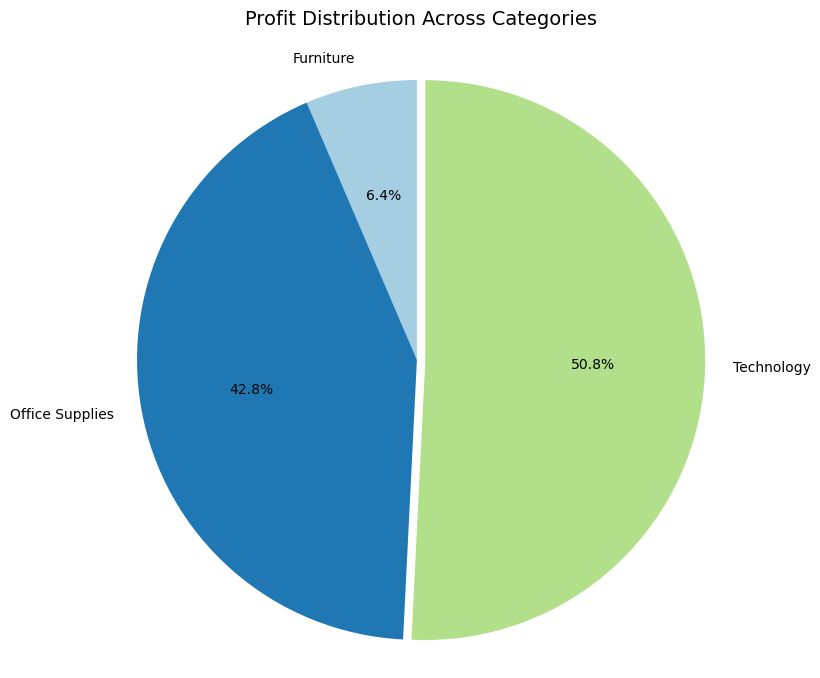

In [196]:
# Find the category with maximum profit
max_profit_category = profit_by_category.idxmax()
explode = [0.03 if cat == max_profit_category else 0 for cat in profit_by_category.index]


# Creating the pie chart
plt.figure(figsize=(10, 8))
plt.pie(profit_by_category, 
        labels=profit_by_category.index, 
        autopct='%1.1f%%',
        explode=explode,
        startangle=90,
        colors=plt.cm.Paired.colors)



# To add an style the title
plt.title('Profit Distribution Across Categories', pad=20, size=14)

# To give equal aspect ratio, and ensure that the pie is drawn as a circle, irrespective of window size.
plt.axis('equal')

# Displays the plot
plt.show()

Query 2 Answer: 
- Technology shows the highest percentage of profit(50.8%) across the three categories, exploded with a factor of 0.03, followed by Office Supplies(42.8%) and Furniture(6.4%).

### 3. Visualize the global sales trends of Nintendo games over time using a line plot. How have Nintendo's sales figures evolved from the 1980s to the 2000s?

Data: https://drive.google.com/file/d/1IwbdhYcqMEf4zZH0Hfgbev9pCrpvJiGk/view?usp=sharing

- The "column_names" list matches the structure of the data: Rank (position), Name (game title), Platform (console), 
Year (release year), Genre (game type), Publisher (company), and sales figures (North America, Europe, Japan, Other regions, Global total).
- "header=None" tells Pandas there’s no header row in the data.
- "names=column_names" assigns our custom column names to the table,
and stores it in the DataFrame "df".

In [208]:
# This loads the uploaded CSV file
file_path = '/Users/user/Desktop/python-tasks/test-week5/task-2/vgsalesnh.csv'

# To define column names that corresponds to the dataset, since the dataset has no headers
column_names = [
    'Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
]


# This reads the CSV file and loads all the rows
df = pd.read_csv(file_path, header=None, names=column_names)


# Displays the first few rows to understand the structure
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- "pd.to_numeric(df['Year'], errors='coerce')" converts the 'Year' column to numbers. 
- If a value can’t be converted (e.g., "N/A"), it becomes NaN.
- "df.dropna()" removes any rows where 'Year' is NaN.
- "subset=['Year']" only checks the 'Year' column for NaN (other columns can have NaN and stay).
- "astype(int)" converts the column’s data type to integer.
- This comes after dropna because integers can’t store NaN (only floats can).

In [209]:
df.loc[:, 'Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])



# Changing the 'Year' column from a float (e.g., 2006.0) to an integer (e.g., 2006).
df['Year'] = df['Year'].astype(int)


# Filter for Nintendo-published games
nintendo_df = df[df['Publisher'] == 'Nintendo'].copy()

nintendo_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- "pd.to_numeric(..., errors='coerce')" converts 'Global_Sales' to numbers, turning invalid values (if any) into NaN.
- "groupby('Year')" groups all rows by their 'Year' value (e.g., all 2006 games together).
- "['Global_Sales'].sum()" adds up the 'Global_Sales' for each year’s group.
- "reset_index()" turns the result into a DataFrame with two columns: 'Year' and 'Global_Sales'.

In [215]:
# To ensure that 'Global_Sales' column is numeric (in case of any issues)
nintendo_df['Global_Sales'] = pd.to_numeric(nintendo_df['Global_Sales'], errors='coerce')


sales_by_year = nintendo_df.groupby('Year')['Global_Sales'].sum().reset_index()


print(sales_by_year)

    Year  Global_Sales
0   1983         10.96
1   1984         45.56
2   1985         49.95
3   1986         16.18
4   1987         11.95
5   1988         36.44
6   1989         63.88
7   1990         35.49
8   1991         15.97
9   1992         38.11
10  1993         20.04
11  1994         24.99
12  1995         16.72
13  1996         73.70
14  1997         25.80
15  1998         48.41
16  1999         65.33
17  2000         34.05
18  2001         45.37
19  2002         48.31
20  2003         38.14
21  2004         60.65
22  2005        127.47
23  2006        205.61
24  2007        104.18
25  2008         91.22
26  2009        128.89
27  2010         61.07
28  2011         51.53
29  2012         56.47
30  2013         52.79
31  2014         48.65
32  2015         27.08
33  2016          3.47


- "(sales_by_year['Year'] >= 1980) & (sales_by_year['Year'] <= 2009)" creates a condition where 'Year' is between 1980 and 2009 (inclusive).
- "sales_by_year[...]" filters the DataFrame to keep only rows meeting this condition.
- "plt.figure(figsize=(12, 6))" creates a blank plot 12 units wide and 6 units tall.
- "plt.plot(...)" draws the line.
- "sales_by_year['Year']" is the X-axis
- "sales_by_year['Global_Sales']" is the Y-axis
- To determine the scale of the Y-axis, Matplotlib looks at the minimum and maximum values in sales_by_year['Global_Sales'].
- It then determines appropriate tick intervals based on the data range.
- "marker='o'" adds a dot at each data point.
- linestyle='-' connects dots with a solid line.
- "color='b'" makes the line blue.
- "plt.grid(True, ...)" adds a dashed grid (--) with slight transparency (alpha=0.7) for readability.
- "plt.xticks(sales_by_year['Year'], rotation=45)" shows every year on the x-axis, rotated 45 degrees so they don’t overlap.
- "plt.tight_layout() "ensures titles, labels, and ticks fit without overlapping or being cut off, irrespective of screen size, orientation or screen frame.

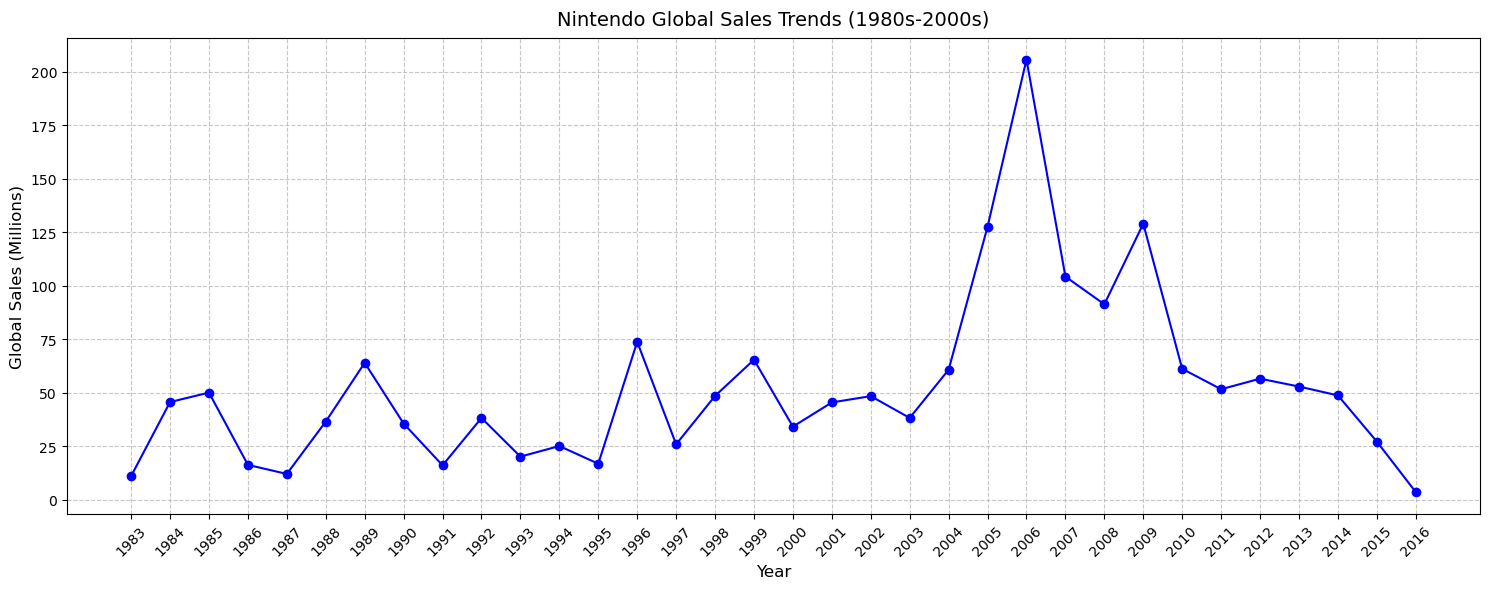

In [217]:

# Filter for years from 1980 to 20016 (1980s to 2000s)
sales_by_year = sales_by_year[(sales_by_year['Year'] >= 1980) & (sales_by_year['Year'] <= 2016)]



# Create the line plot
plt.figure(figsize=(15, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], marker='o', linestyle='-', color='b')


# Customize and style the graph
plt.title('Nintendo Global Sales Trends (1980s-2000s)', fontsize=14, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(sales_by_year['Year'], rotation=45)



# To adjust layout to prevent label cutoff
plt.tight_layout()



# Display the plot
plt.show()

Query 3 Answer:
- Between the 1980's and early 2000's, there's a regular fluctuation in Global sales, within the range of 10 Million and 75 Million.
- Nintendo's Global sales increased steadily from 2003(around 60 Million) to a significantly high peak at around 200 Million by 2006.
- This was followed by a drop in sales by 2007 and 2008 to about 100 Million.
- Then, there was an increase to 125 Million+ in 2009.

### 4. In Saudi Arabia, the 5-day workweek starts on Sunday. Analyze the impact of the weekend and weekday quote dates on the quote price.

Data: https://drive.google.com/file/d/1vROMYOn9OUrIS7ChIIzkGpjeEdxm5Pe1/view?usp=sharing

In [219]:
# This loads the uploaded CSV file
file_path = '/Users/user/Desktop/python-tasks/test-week5/task-2/luxury_goods.csv'

# This reads the CSV file and loads all the rows
df = pd.read_csv(file_path)

# Displays the first few rows to understand the structure
df.head()

,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN


- "pd.to_datetime(...)" changes strings like "2022-11-03" into datetime objects Pandas can analyze.
- For "errors='coerce'", If a date is invalid (e.g., "N/A" or something else), it becomes NaT (Not a Time) instead of crashing
- "dropna(subset=['Quote Date', 'Quote Price'])" checks these two columns ALONE for NaT or NaN and drops those rows,
and then updates the DataFrame with the cleaned version.
- "pd.to_numeric(...)" converts the column to numbers (e.g., 300 stays 300, "bro" becomes NaN).
This further cleans any irregularities in the dataset.
- "df['Quote Price'].notna()" keeps rows where 'Quote Price' isn’t NaN.
- "df['Quote Price'] > 0" keeps rows where 'Quote Price' is positive (greater than 0).
- df[...]: Applies the filter to the DataFrame.

In [220]:
# To convert 'Quote Date' to datetime, handle invalid dates
df['Quote Date'] = pd.to_datetime(df['Quote Date'], errors='coerce')



# Drop rows with invalid 'Quote Date' or 'Quote Price'
df = df.dropna(subset=['Quote Date', 'Quote Price'])


# To ensure 'Quote Price' is numeric.
df['Quote Price'] = pd.to_numeric(df['Quote Price'], errors='coerce')



df = df[(df['Quote Price'].notna()) & (df['Quote Price'] > 0)]


df.head()

,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN


- A function to label dates as 'Weekend' or 'Weekday' based on Saudi Arabia’s workweek.
- "date.weekday()" returns a number (0–6) for the day of the week (0 = Monday, 4 = Friday, 5 = Saturday, 6 = Sunday).
- "weekday_num in [4, 5]" checks if it’s Friday (4) or Saturday (5), the Saudi weekend, 
and returns it as a 'Weekend', else, returns it as a 'Weekday'.
- ".apply(is_weekend_saudi)" runs the function on every 'Quote Date' value.
- "df['Day Type']" stores the result ('Weekend' or 'Weekday') in a new column- 'Day Type'

In [221]:
def is_weekend_saudi(date):
    # 0 = Monday, 4 = Friday, 5 = Saturday, 6 = Sunday
    weekday_num = date.weekday()
    return 'Weekend' if weekday_num in [4, 5] else 'Weekday'


# To apply the classification to 'Quote Date', and add a new column to each quote's date.
df['Day Type'] = df['Quote Date'].apply(is_weekend_saudi)


df.head()

,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method,Day Type
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH,Weekday
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal,Weekday
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal,Weekday
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN,Weekday
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN,Weekday


- "groupby('Day Type')" groups the data into two: 'Weekday' and 'Weekend', and then,
- "['Quote Price'].agg([...])" calculates for each group.
- "reset_index()" turns the result into a DataFrame with 'Day Type' as a column.

In [222]:
# To group by 'Day Type' and calculate statistics for 'Quote Price'
price_stats = df.groupby('Day Type')['Quote Price'].agg(['mean', 'median', 'count', 'sum']).reset_index()


# Display the statistics
print("Quote Price Statistics by Day Type (Saudi Workweek):")
print(price_stats)

Quote Price Statistics by Day Type (Saudi Workweek):
  Day Type        mean  median  count      sum
0  Weekday  889.632075  444.50     53  47150.5
1  Weekend  842.900000  549.75     10   8429.0


- "plt.figure(figsize=(8, 6))" sets the plot size (8 units wide, 6 tall).
- "plt.bar(...)" draws bars.
- price_stats['Day Type']: The X-axis (Weekday, Weekend).
- price_stats['sum']: The Y-axis (Total quote price).
- "color=['blue', 'orange']" colors the bars for visual distinction.
- "grid" adds dashed lines (--) with transparency (alpha=0.7) to help read values.
- "enumerate(price_stats['mean'])" loops over all the means with an index (i) and value (v).
- Then, "plt.text(...)" adds text.
- The text has i: X-position (0 for Weekday, 1 for Weekend).
- And v + 10: Y-position (slightly above the bar).
- "f'{v:.2f}'" formats the value to 2 decimal places.
- "ha='center'" centers the text.
- plt.tight_layout() ensures titles, labels, and ticks fit without overlapping or being cut off, irrespective of screen size, orientation or screen frame.

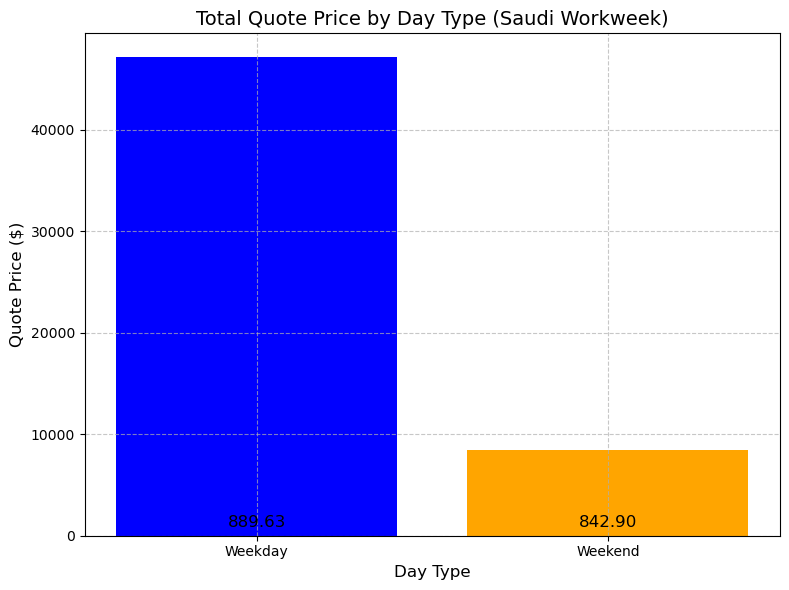

In [180]:
# Visualization: Bar plot of the total quote price by day type, with the average quote price as tags.
plt.figure(figsize=(8, 6))
plt.bar(price_stats['Day Type'], price_stats['sum'], color=['blue', 'orange'])
plt.title('Total Quote Price by Day Type (Saudi Workweek)', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Quote Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)



# To add the value of the average quote price labels on top of bars
for i, v in enumerate(price_stats['mean']):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', fontsize=12)



# To adjust layout to prevent label cutoff
plt.tight_layout()


# To display the plot.
plt.show()

Query 4 Answer:
- The bar chart shows that the total and average quote price on weekdays (Sunday–Thursday) are higher than on weekends (Friday–Saturday).
- The statistics table shows a higher count of quotes on weekdays (e.g., 53) compared to weekends (e.g., 8), which could mean that business activity is likely higher during the workweek. This has a direct impact on the total quote price.